# `1.daphne`

In [2]:
from daphne import daphne
import os, json
import numpy as np
import torch
from torch import tensor
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def ast_helper(fname,directory):
    sugared_fname = '../prob_prog/hw/hw6/CS532-HW6/{}/{}'.format(directory,fname)
    desugared_ast_json_fname = '/Users/gw/repos/prob_prog/' + sugared_fname.replace('.daphne','.json')
    if os.path.isfile(desugared_ast_json_fname):
        with open(desugared_ast_json_fname) as f:
            ast = json.load(f)
    else:
        #note: the sugared path that goes into daphne desugar should be with respect to the daphne path!
        ast = daphne(['desugar-hoppl-cps', '-i', sugared_fname]) 

        with open(desugared_ast_json_fname, 'w') as f:
            json.dump(ast, f)
    return ast

i=1
fname = '{}.daphne'.format(i)
exp = ast_helper(fname,directory='programs')
%cat programs/1.daphne

(defn until-success [p n]
   (if (sample (flip p))
     n
     (until-success p (+ n 1))))

(let [p 0.01]
  (until-success p 0))


In [8]:
import smc, evaluator
import importlib
importlib.reload(smc)

<module 'smc' from '/Users/gw/repos/prob_prog/hw/hw6/CS532-HW6/smc.py'>

In [11]:
output = lambda x: x
evaluator.evaluate(exp, env=None)('addr_start', output)

(<function primitives.push_addr(alpha, value, k)>,
 ['addr_start', '0', <evaluator.Procedure at 0x135e73640>],
 {'type': 'proc'})

In [14]:
n_particles=3
logZ, particles = smc.SMC(n_particles, exp)
particles

In SMC step 0, Zs:  []


[tensor(42), tensor(122), tensor(88)]

Note that there are no observed in this program, and thus Z is undefined

In SMC step 0, Zs:  []
In SMC step 0, Zs:  []
In SMC step 0, Zs:  []
In SMC step 0, Zs:  []
In SMC step 0, Zs:  []
In SMC step 0, Zs:  []


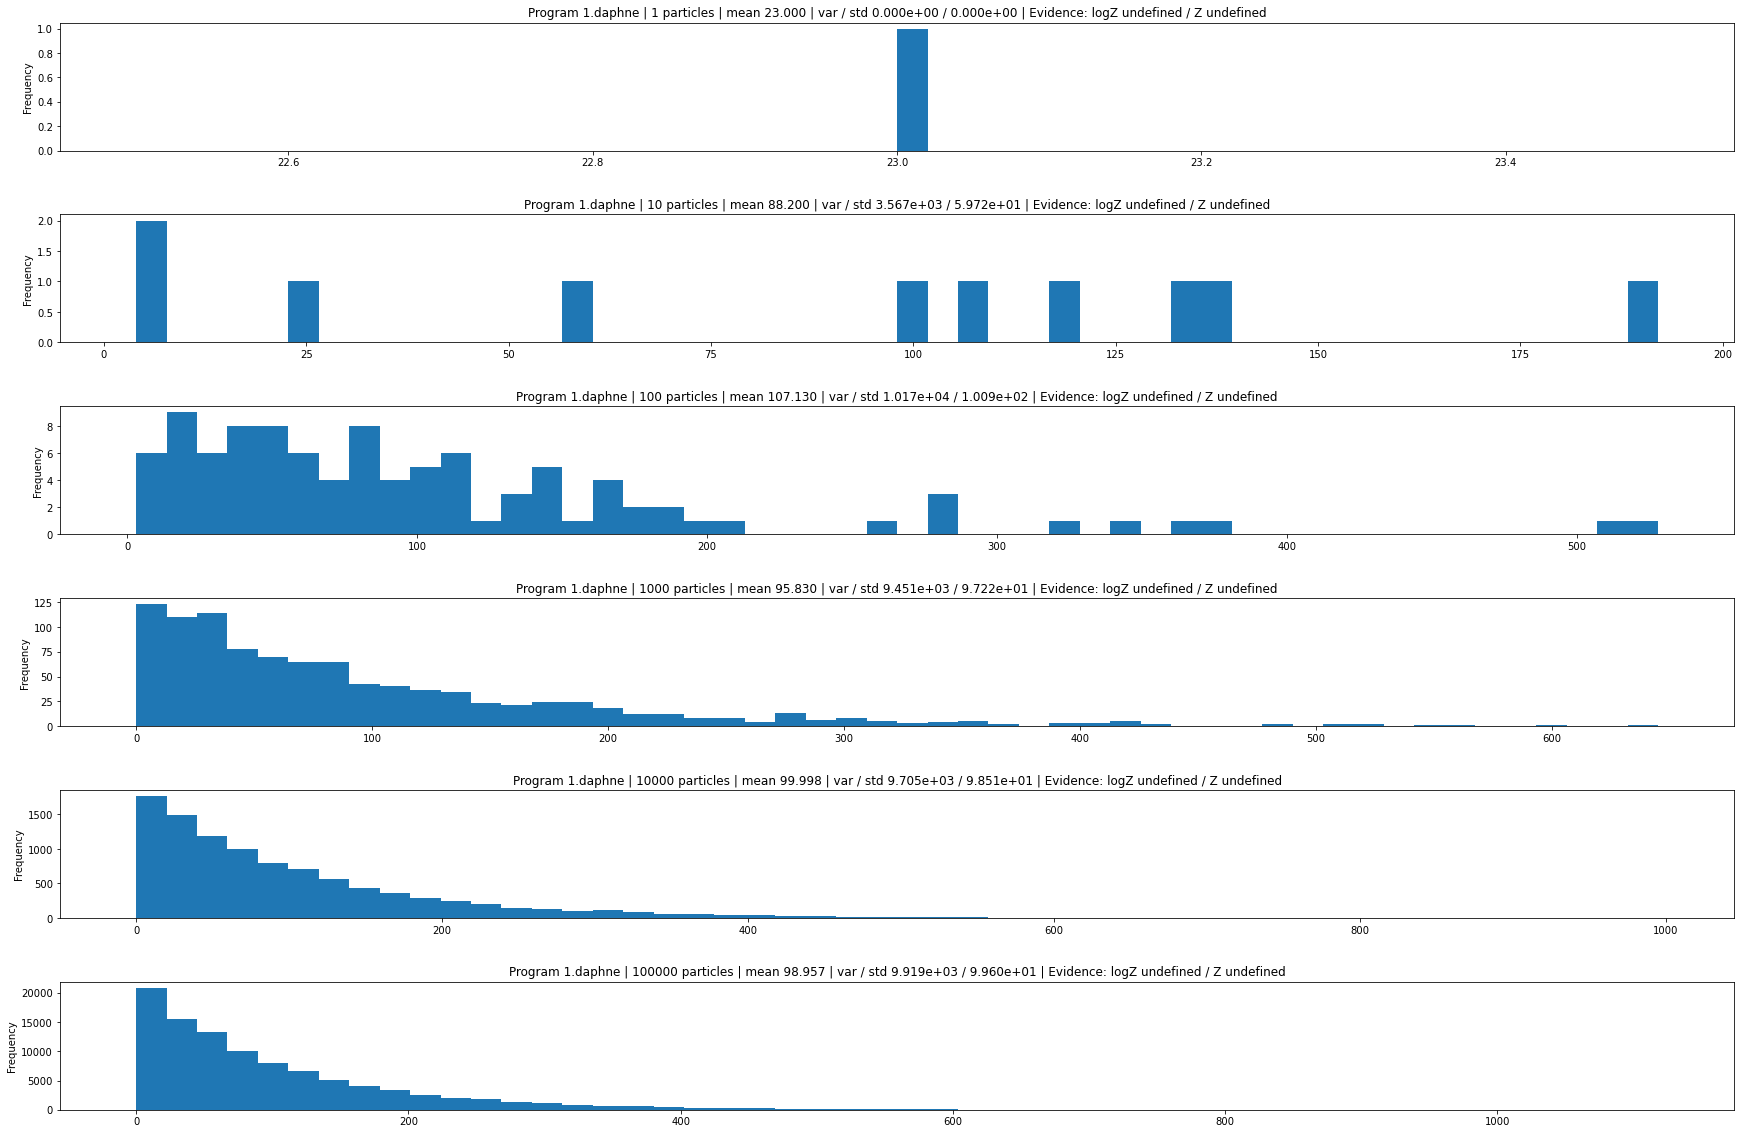

In [17]:
particle_counts = [1,10,100,1000,10000,100000]
fig, axes = plt.subplots(nrows=len(particle_counts),figsize=(30,20))
# fig.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5) # https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

for idx, n_particles in enumerate(particle_counts):
    logZ, particles = smc.SMC(n_particles, exp)
    samples_array = np.array([sample.item() for sample in particles])
    mean = samples_array.mean()
    var = samples_array.var()
    pd.Series(samples_array).plot.hist(ax=axes[idx], bins=50, title='Program {} | {} particles | mean {:1.3f} | var / std {:1.3e} / {:1.3e} | Evidence: logZ undefined / Z undefined'.format(fname, n_particles, mean, var, np.sqrt(var) ))
